In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Store 5.csv')

This function will get the data by weeks. 

In [3]:
def transform_dataset(file1):
    temp = np.asarray(file1['Sales Price']>file1['MRP'])
    temp1 = np.where(temp==True)
    temp1 = temp1[0]
    file2 = file1.drop(temp1,axis=0)
    file2.drop_duplicates()
    file3 = file2.sort_values(by=['Sale Date'])
    file4 = file3.drop('Sale/Return',axis=1)
    file4['Sale Date1'] = pd.to_datetime(file3['Sale Date'])
    file4['Month'] = file4['Sale Date1'].dt.month
    file4['Year'] = file4['Sale Date1'].dt.year
    file4['Week'] = file4['Sale Date1'].dt.week
    file4['Convenient week'] = (file4['Year'] - 2000)*10000 + file4['Month']*100 + file4['Week']
    k1 = np.asarray(file4['Convenient week']== 170152)
    k1 = np.where(k1 == True)
    k1 = k1[0]
    L = np.array(file4['Convenient week'])
    L[k1] = 161252
    #print(L)
    file4['Convenient week'] = L
    #file4['Month1'] = (file4['Year'] - 2000)*100 + file4['Month']
    del file4['Sale Date1']
    del file4['Bill Number']
    del file4['Store Code']

    
    mrp = np.asarray(file4['MRP'])
    sp = np.asarray(file4['Sales Price'])
    
    discount_percent = np.zeros(len(mrp))
    for i in range(len(mrp)):
        if(mrp[i]>0):
            discount_percent[i] = (mrp[i] - sp[i])/mrp[i] * 100
    file4['Discount Percent'] = discount_percent
    
    temp = np.asarray(file4['Discount Percent'] == 100)
    temp1 = np.where(temp == True)
    temp1 = temp1[0]
    if(len(temp1)!=0):
        file5 = file4.drop(temp1[0],axis=0)
    
    return file4

In [4]:
dataset_transformed = transform_dataset(dataset)

In [5]:
dataset_transformed.head(25)

,SKU Code,Brand Code,Category,Sale Date,MRP,Sales Price,Sales Qty,Month,Year,Week,Convenient week,Discount Percent
705,SKU0423,BRAND013,Cat01,2017-01-01,54.67,54.67,1,1,2017,52,161252,0.0
712,SKU0042,BRAND008,Cat01,2017-01-01,40.67,40.67,1,1,2017,52,161252,0.0
711,SKU0934,BRAND035,Cat08,2017-01-01,5.33,5.33,1,1,2017,52,161252,0.0
710,SKU0933,BRAND034,Cat07,2017-01-01,6.67,6.67,1,1,2017,52,161252,0.0
706,SKU0385,BRAND003,Cat01,2017-01-01,86.67,86.67,1,1,2017,52,161252,0.0
708,SKU0232,BRAND012,Cat01,2017-01-01,23.33,23.33,1,1,2017,52,161252,0.0
707,SKU0142,BRAND004,Cat01,2017-01-01,86.67,86.67,1,1,2017,52,161252,0.0
709,SKU0932,BRAND005,Cat01,2017-01-01,69.33,69.33,1,1,2017,52,161252,0.0
713,SKU0935,BRAND034,Cat07,2017-01-02,21.33,21.33,1,1,2017,1,170101,0.0
714,SKU0928,BRAND034,Cat07,2017-01-02,21.33,21.33,1,1,2017,1,170101,0.0


In [6]:
dk = dataset_transformed.groupby('Convenient week').sum()
dk1 = dataset_transformed.groupby('Convenient week').mean()
dk2 = dataset_transformed.groupby('Convenient week').agg(lambda x:x.value_counts().index[0])

Here is a heuristic. Since the sales are dependent on the category and brand, and the final target being the forecasting of the overall sales, the most sold items in a particular week are considered. Also the most sold brands are also considered. Here we can also reduce the features by grouping the brand codes into categories. And we can have an optimum set of features. But the underlying inherent way of extracting this feature is considering the maximum of all categorical variables sold in the particular week.

# Feature Engineering

In [7]:
dk['Avg Sales Price'] = dk1['Sales Price']
# the average sales price is not the best metric, we can have a weighted sales metric. As in, the most number of sold items will 
# have more weightage in deciding the sales price for that week.
dk['Avg Discount'] = dk1['Discount Percent']
#average discount price but it can also be weighted.
dk['Avg MRP'] = dk1['MRP']
k1 = [ele for ele,count in enumerate(np.asarray(np.unique(dataset_transformed['Convenient week'])))]
dk['Week number'] = k1

dk['Brand Code'] = dk2['Brand Code']
dk['Category'] = dk2['Category']
del dk['Month']
del dk['Year']
del dk['Week']
del dk1
del dk2

In [8]:
print(np.unique(dk['Brand Code']))
print(np.unique(dk['Category']))

['BRAND004' 'BRAND017' 'BRAND018' 'BRAND027' 'BRAND033' 'BRAND034']
['Cat01' 'Cat04' 'Cat07']


<Figure size 1080x504 with 0 Axes>

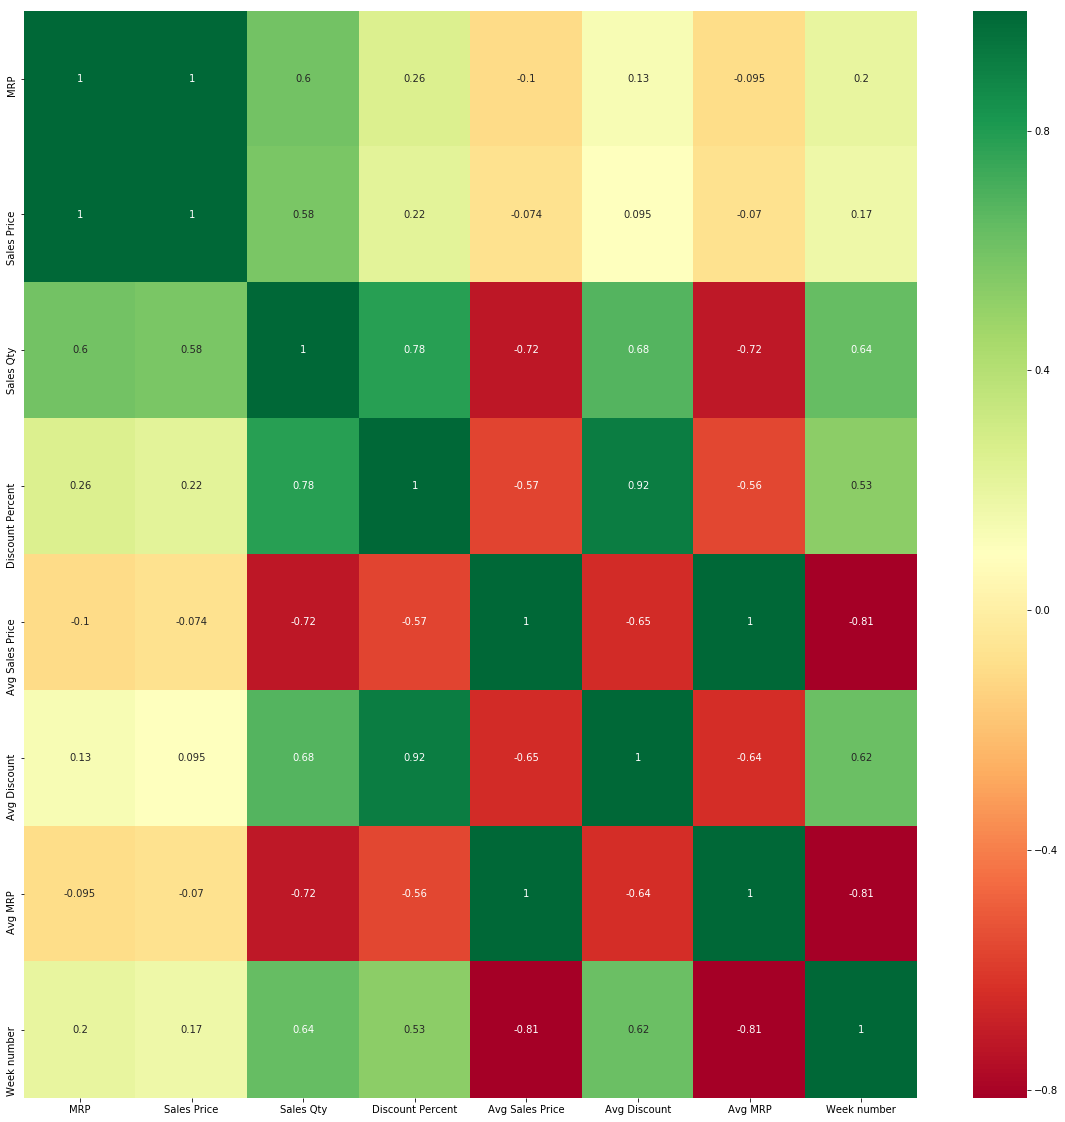

<Figure size 1080x504 with 0 Axes>

In [9]:
corrmat = dk.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dk[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.figure(figsize=(15,7))

In [10]:
#del dk['Avg MRP']
del dk['Discount Percent']
del dk['MRP']

Since the feature has 3 and 5 values, we can use one hot encoding for both, separately.

In [11]:
dk.head(10)

,Sales Price,Sales Qty,Avg Sales Price,Avg Discount,Avg MRP,Week number,Brand Code,Category
Convenient week,,,,,,,,
161252,373.34,8,46.667500,0.000000,46.667500,0,BRAND004,Cat01
170101,2211.21,43,51.423488,0.000000,51.423488,1,BRAND034,Cat01
170102,3765.17,74,50.880676,0.233373,51.042838,2,BRAND034,Cat01
170103,5711.51,114,49.237155,0.000000,49.237155,3,BRAND034,Cat01
170104,4214.49,108,39.023056,0.000000,39.023056,4,BRAND034,Cat07
170105,864.00,21,41.142857,0.000000,41.142857,5,BRAND034,Cat07
170205,1901.95,46,41.346739,0.000000,41.346739,6,BRAND034,Cat01
170206,6345.63,164,38.692866,0.000000,38.692866,7,BRAND034,Cat07
170207,6965.15,227,30.819248,0.000000,30.819248,8,BRAND034,Cat07


<Figure size 1080x504 with 0 Axes>

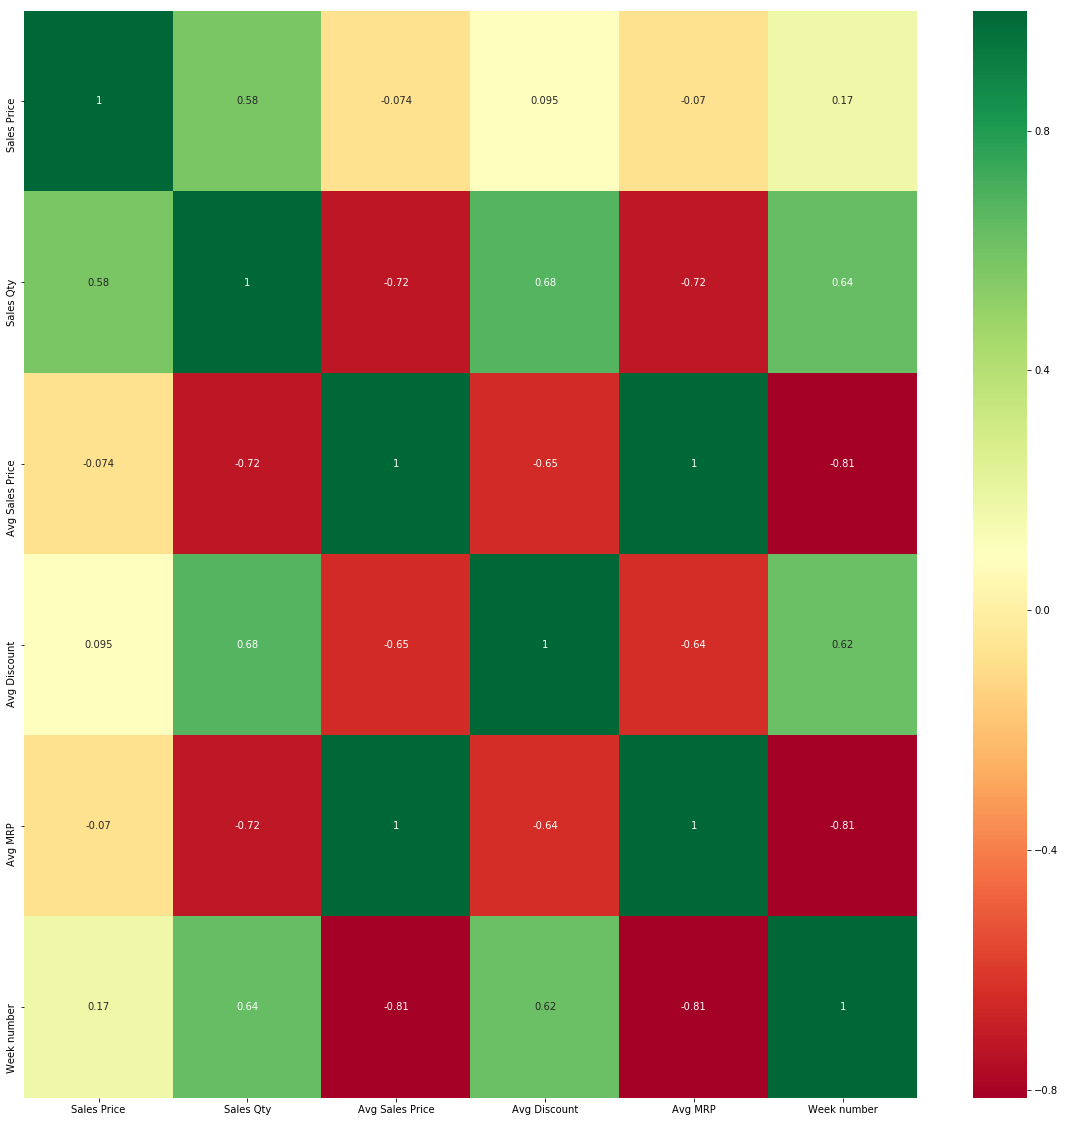

<Figure size 1080x504 with 0 Axes>

In [12]:
corrmat = dk.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dk[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.figure(figsize=(15,7))

In [13]:
del dk['Avg Sales Price']
dk.head()

,Sales Price,Sales Qty,Avg Discount,Avg MRP,Week number,Brand Code,Category
Convenient week,,,,,,,
161252,373.34,8,0.000000,46.667500,0,BRAND004,Cat01
170101,2211.21,43,0.000000,51.423488,1,BRAND034,Cat01
170102,3765.17,74,0.233373,51.042838,2,BRAND034,Cat01
170103,5711.51,114,0.000000,49.237155,3,BRAND034,Cat01
170104,4214.49,108,0.000000,39.023056,4,BRAND034,Cat07


In [14]:
#X = np.concatenate((np.array([np.asarray(dk['Avg MRP'])]),np.array([np.asarray(dk['Avg Sales Price'])]),np.array([np.asarray(dk['Avg Discount'])]),
#                    np.array([np.asarray(dk['Brand Code'])]),np.array([np.asarray(dk['Category'])]),np.array([np.asarray(dk['Week number'])])),0)

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
X1=labelencoder_X.fit_transform(dk['Brand Code'])
onehotencoder= OneHotEncoder(categorical_features= [0])
X2= onehotencoder.fit_transform(X1.reshape(-1,1)).toarray()
X2 = X2[:,:-1]

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
X1=labelencoder_X.fit_transform(dk['Category'])
onehotencoder= OneHotEncoder(categorical_features= [0])
X3= onehotencoder.fit_transform(X1.reshape(-1,1)).toarray()
X3 = X3[:,:-1]

X = np.concatenate((np.array([np.asarray(dk['Week number'])]),np.array([np.asarray(dk['Avg MRP'])]),np.array([np.asarray(dk['Avg Discount'])]),np.array([np.asarray(dk['Sales Price'])])),0)
X = np.concatenate((X.T,X2,X3),1)

In [15]:
X_train = X[0:53,:]
X_val = X[53:63,:]
X_test = X[63:,]

In [16]:
sales_data = np.asarray(dk['Sales Qty'])
y_train = (sales_data[0:53])
y_val = (sales_data[53:63])
y_test = (sales_data[63:])

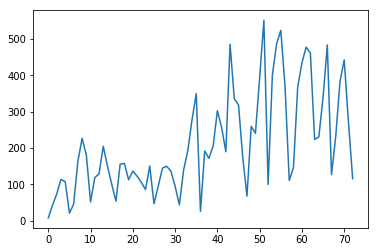

In [17]:
plt.plot(sales_data)

(array([ 9., 13., 15.,  9.,  8.,  2.,  6.,  4.,  5.,  2.]),
 array([  8. ,  62.4, 116.8, 171.2, 225.6, 280. , 334.4, 388.8, 443.2,
        497.6, 552. ]),
 <a list of 10 Patch objects>)

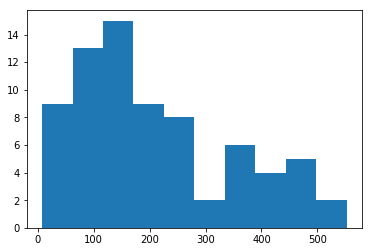

In [18]:
plt.hist(sales_data)

An analysis of the output in terms of autocorrelation, pacf and integrating effect.

# ARIMA modeling on Log Data 
(using log to suppress the varying volatility or the variance in the data).

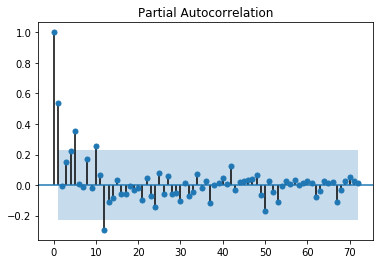

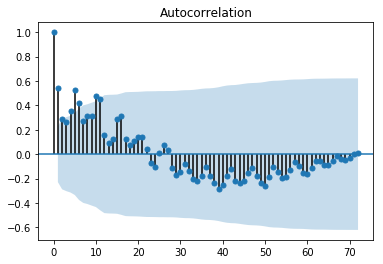

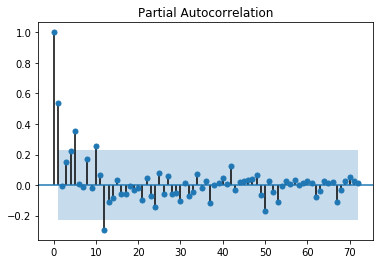

In [19]:
from statsmodels.tsa.arima_model import ARIMA
plot_acf(sales_data)
plot_pacf(sales_data,method='ywmle')

So from the ACF and PACF it is evident that the data is cannot be modelled by simple AR or MA or ARMA process. It could be but it would be a very high order model.

Checking for stationarity using ADF (Augemented Dicker Fuller test). 

In [20]:

result = adfuller(sales_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.975535
p-value: 0.762082
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


Since p-vale is greater than all the significance level mentioned we can say that the data is non-stationary and we cannot use ARMA. We could try ARMA on a differenced series (i.e ARIMA in a way). But checking the stationarity on the differenced series as well. This will check for integrating effect on the same.

ADF Statistic: -2.466247
p-value: 0.123904
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593
ADF Statistic: -3.093043
p-value: 0.027072
Critical Values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


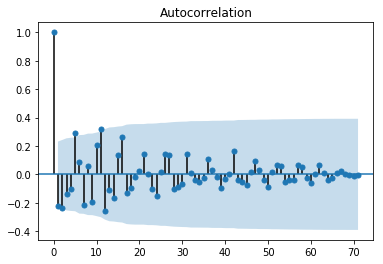

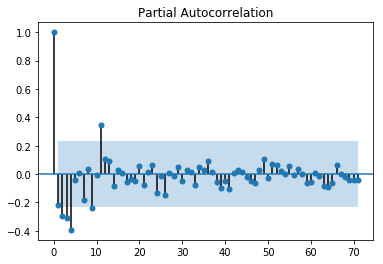

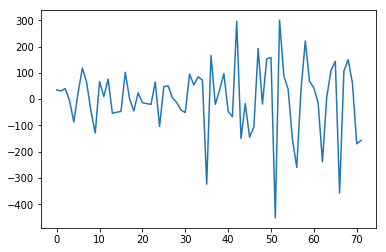

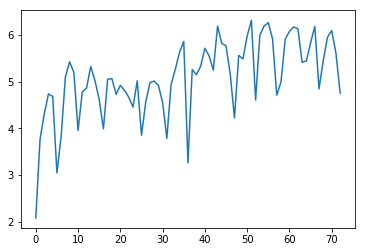

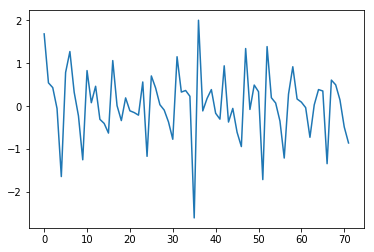

In [21]:
result = adfuller(np.diff(sales_data))
plot_acf(np.diff(sales_data))
plot_pacf(np.diff(sales_data),method='ywmle')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
plt.figure()    
plt.plot(np.diff(sales_data))  
plt.figure()
t = np.log(sales_data)
plt.plot(t)
plt.figure()
plt.plot(np.diff(t))

result = adfuller(np.diff(t))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

As we can see visually that the variance is varying across the time, the least squares linear regression will not have the best fit because the errors will not be homoscedastic. Anyway below are a few trials and modelling for linear regression as mentioned in the mail. But I am sure these won't be helpful.

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
Xtrain = sc_X.fit_transform(X_train)
Xval = sc_X.transform(X_val)
Xtest = sc_X.transform(X_test)

Still fitting ARIMA to the log data.

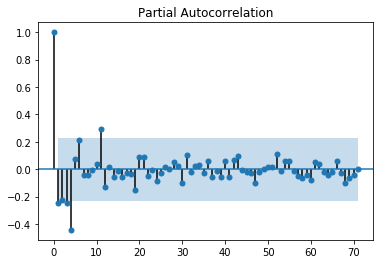

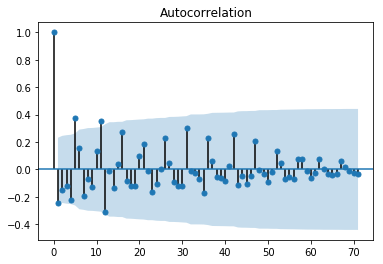

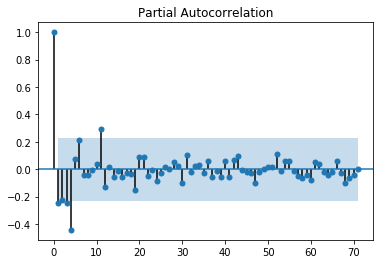

In [23]:
sales_data_log = np.log(sales_data)
y_train1 = sales_data_log[0:57]
y_test1 = sales_data_log[57:]
plot_acf(np.diff(sales_data_log))
plot_pacf(np.diff(sales_data_log),method='ywmle')

Since the differenced thing is also showing the same ACF, PACF we can proceed without differencing i.e. need not use Integrating effect in ARIMA.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   57
Model:                     ARMA(5, 2)   Log Likelihood                 -48.538
Method:                       css-mle   S.D. of innovations              0.544
Date:                Thu, 13 Jun 2019   AIC                            115.076
Time:                        05:16:37   BIC                            133.464
Sample:                             0   HQIC                           122.222
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8397      0.517      9.366      0.000       3.827       5.853
ar.L1.y        0.5590      0.174      3.208      0.002       0.218       0.900
ar.L2.y       -0.4341      0.178     -2.438      0.0

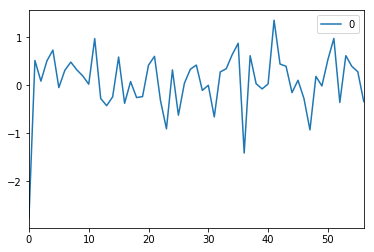

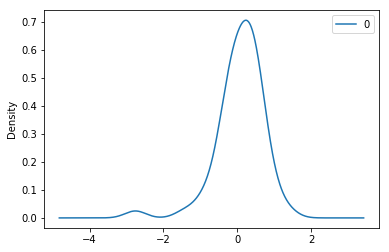

               0
count  57.000000
mean    0.076372
std     0.633090
min    -2.760302
25%    -0.239060
50%     0.105340
75%     0.442859
max     1.355753


In [24]:
modl = ARIMA(y_train1,order = (5,0,2))
model_fit = modl.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

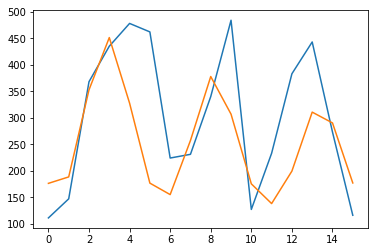

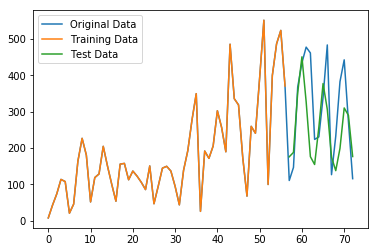

In [25]:
predicions1, std, conf=model_fit.forecast(16)
#plt.plot(predicions1)
y1 = np.exp(y_test1)
p1 =np.exp(predicions1)
plt.plot(y1)
plt.plot(p1)

plt.figure()
plt.plot(np.arange(len(sales_data)),sales_data)
plt.plot(np.arange(len(y_train1)),np.exp(y_train1))
plt.plot(len(y_train1)+np.arange(len(y_test1)),p1)
plt.legend(['Original Data','Training Data','Test Data'])

In [26]:
score1 = r2_score(y1,p1)
score_arima = np.sqrt(mean_squared_error(np.exp(y_test1),np.exp(predicions1)))
print(score1)
print(score_arima)

0.2363183682601715
116.02744391559382


Just playing around to decompose the sales data.

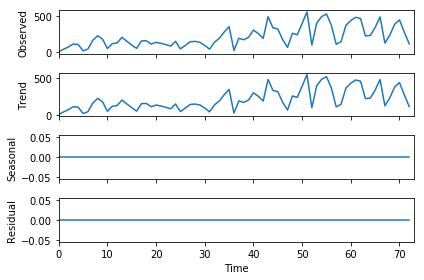

<Figure size 1080x720 with 0 Axes>

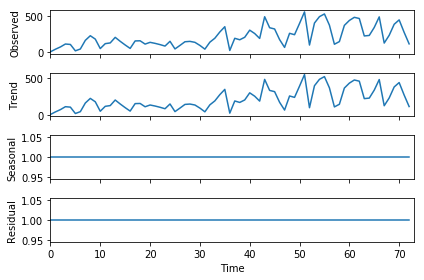

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

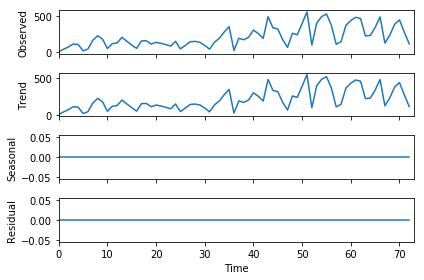

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales_data, model='multiplicative', freq=1)
plt.figure(figsize=(15,10))
result.plot()

plt.figure()
result = seasonal_decompose(sales_data, model='additive', freq=1)
plt.figure(figsize=(15,10))
result.plot()

In [28]:
def get_adjusted_rsquared(X,y,predictions):
    n = X.shape[0]
    k = X.shape[1]
    rsquared = r2_score(y,predictions)
    means = np.sqrt(mean_squared_error(y,predictions))
    if(n>k):
        adjusted_rsquared = 1 - ((1-rsquared)*(n-1)/(n-(k+1)))
    else:
        adjusted_rsquared = rsquared
        print('Keeping the same value as R-Squared for the sake of it. Because number of observations greater than number of observations')
    return rsquared, adjusted_rsquared, means

# Regression

R2 on train is : 0.8419251920650714
Adjusted R2 on train is : 0.7995148777410662
RMSE on train is : 44.60898572667089


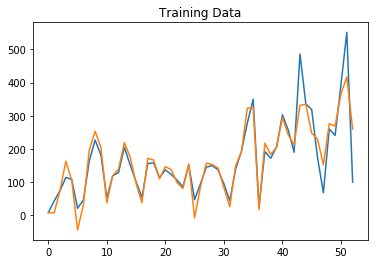

In [29]:
mod = LinearRegression()
mod.fit(Xtrain,y_train)
predictions = mod.predict(Xtrain)

plt.plot(y_train)
plt.plot(predictions)
plt.title('Training Data')

R2_train, adjR2_train,means = get_adjusted_rsquared(Xtrain,y_train,predictions)
print('R2 on train is :',R2_train)
print('Adjusted R2 on train is :',adjR2_train)
print('RMSE on train is :',means)

Keeping the same value as R-Squared for the sake of it. Because number of observations greater than number of observations
R2 on validation is : 0.7204315741868903
Adjusted R2 on validation is : 0.7204315741868903
RMSE on validation is : 70.6982244454651


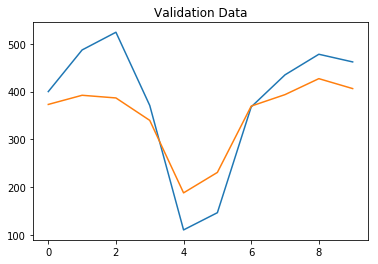

In [30]:
plt.title('Validation Data')
predictions_val = mod.predict(Xval)

plt.plot(y_val)
plt.plot(predictions_val)

R2_val, adjR2_val,means = get_adjusted_rsquared(Xval,y_val,predictions_val)
print('R2 on validation is :',R2_val)
print('Adjusted R2 on validation is :',adjR2_val)
print('RMSE on validation is :',means)

Keeping the same value as R-Squared for the sake of it. Because number of observations greater than number of observations
R2 on test is : 0.8156023881786261
Adjusted R2 on test is : 0.8156023881786261
RMSE on test is : 50.84583339038213


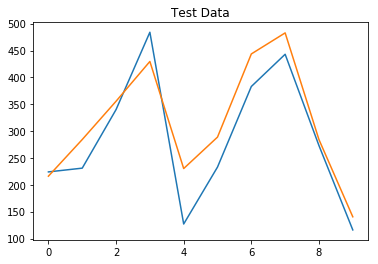

In [31]:
plt.title('Test Data')
predictions_test = mod.predict(Xtest)

plt.plot(y_test)
plt.plot(predictions_test)

R2_val, adjR2_val,linreg_rmse = get_adjusted_rsquared(Xtest,y_test,predictions_test)
print('R2 on test is :',R2_val)
print('Adjusted R2 on test is :',adjR2_val)
print('RMSE on test is :',linreg_rmse)

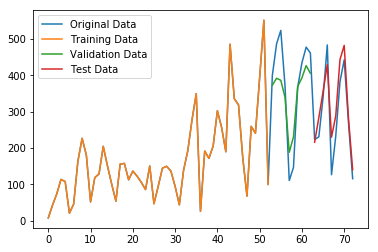

In [32]:
plt.figure()
plt.plot(sales_data)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_val))+len(y_train),predictions_val)
plt.plot(np.arange(len(y_test))+len(y_train) + len(y_val),predictions_test)
plt.legend(['Original Data','Training Data','Validation Data','Test Data'])

So this has worked quite well compared to the past ARIMA Model. But exploring further.

Now choosing without the categorical variables. Looking at the results. Since MRP and Sales price are almost similar the problem of multicolinearity will exist so ignoring MRP.

R2 on train is : 0.4928525603821162
Adjusted R2 on train is : 0.46180271714020493
RMSE on train is : 79.90208939739034


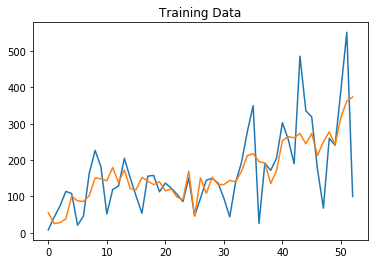

In [33]:
Xtrain1 = Xtrain[:,0:3]
Xval1 = Xval[:,0:3]
Xtest1 = Xtest[:,0:3]

mod = LinearRegression()
mod.fit(Xtrain1,y_train)
predictions = mod.predict(Xtrain1)

plt.plot(y_train)
plt.plot(predictions)
plt.title('Training Data')

R2_train, adjR2_train,mean = get_adjusted_rsquared(Xtrain1,y_train,predictions)
print('R2 on train is :',R2_train)
print('Adjusted R2 on train is :',adjR2_train)
print('RMSE on train is :',mean)

R2 on validation is : 0.08480464102993635
Adjusted R2 on validation is : -0.3727930384550955
RMSE on validation is : 127.91496338491434


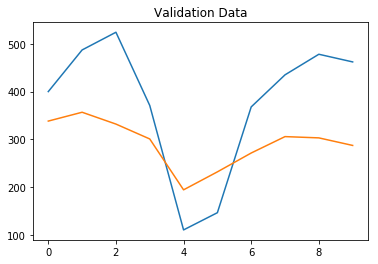

In [34]:
plt.title('Validation Data')
predictions = mod.predict(Xval1)

plt.plot(y_val)
plt.plot(predictions)

R2_val, adjR2_val,means = get_adjusted_rsquared(Xval1,y_val,predictions)
print('R2 on validation is :',R2_val)
print('Adjusted R2 on validation is :',adjR2_val)
print('RMSE on validation is :',means)

Keeping the same value as R-Squared for the sake of it. Because number of observations greater than number of observations
R2 on test is : -0.1328137445330717
Adjusted R2 on test is : -0.1328137445330717
RMSE on test is : 50.84583339038213


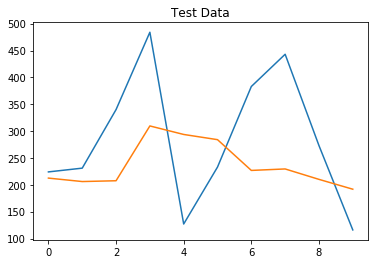

In [35]:
plt.title('Test Data')
predictions_test = mod.predict(Xtest1)

plt.plot(y_test)
plt.plot(predictions_test)

R2_val, adjR2_val,linreg1_rmse = get_adjusted_rsquared(Xtest,y_test,predictions_test)
print('R2 on test is :',R2_val)
print('Adjusted R2 on test is :',adjR2_val)
print('RMSE on test is :',linreg_rmse)

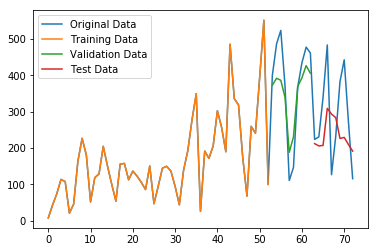

In [36]:
plt.figure()
plt.plot(sales_data)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_val))+len(y_train),predictions_val)
plt.plot(np.arange(len(y_test))+len(y_train) + len(y_val),predictions_test)
plt.legend(['Original Data','Training Data','Validation Data','Test Data'])

So clearly the Linear regression is not working without Categorical Variables. And so trying out RandomForestRegression. 

# RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(Xtrain, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [38]:
predictions = rf.predict(Xtrain)

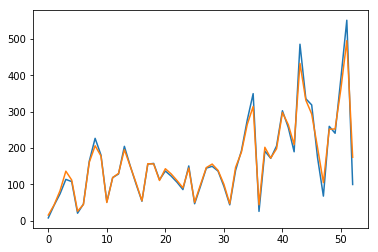

In [39]:
plt.plot(y_train)
plt.plot(predictions)

In [40]:
rsquared,adj_rsquared,means = get_adjusted_rsquared(Xtrain,y_train,predictions)
print(rsquared,adj_rsquared,means)

0.970966491855381 0.9631770140604832 19.117925945374672


Keeping the same value as R-Squared for the sake of it. Because number of observations greater than number of observations
0.7082371894368682 0.7082371894368682 72.22364675090839
Keeping the same value as R-Squared for the sake of it. Because number of observations greater than number of observations
R2 on test is : -0.1328137445330717
Adjusted R2 on test is : -0.1328137445330717
RMSE on test is : 126.02507914559051


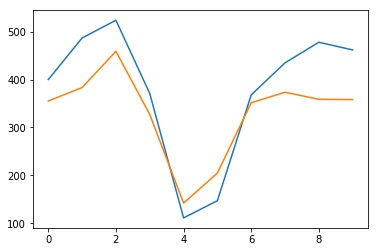

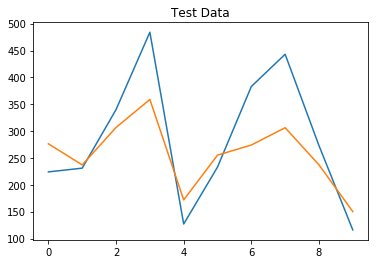

In [41]:
predictions_val_rf = rf.predict(Xval)
rsquared,adj_rsquared,means = get_adjusted_rsquared(Xval,y_val,predictions_val_rf)
print(rsquared,adj_rsquared,means)
plt.plot(y_val)
plt.plot(predictions_val_rf)

plt.figure()
plt.title('Test Data')
predictions_test_rf = rf.predict(Xtest)

plt.plot(y_test)
plt.plot(predictions_test_rf)

R2_val, adjR2_val,rfmeans = get_adjusted_rsquared(Xtest,y_test,predictions_test)
print('R2 on test is :',R2_val)
print('Adjusted R2 on test is :',adjR2_val)
print('RMSE on test is :',rfmeans)

Usually, RandomForests don’t fit very well for increasing or decreasing trends which are usually encountered when dealing with time-series analysis, such as seasonality. (Problem of extrapolation). For any data, that a Random Forest has not seen before, at best, it can predict an average of training values that it has seen before. Random Forest will provide us with average results as it is not able to extrapolate and understand the growing/decreasing trend in our data. Also, since it groups the dependent variables on the input features (also the time feature), it at best provides predictions close to the mean.

Surprisingly it has worked well in this case. The reason being that it is not only dependent on time, but also on the brand value, category and other features. Since those are the factors causing a much larger impact, the forecasts are better.

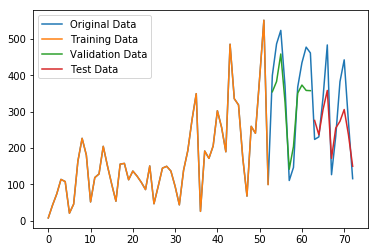

In [42]:
plt.figure()
plt.plot(sales_data)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_val))+len(y_train),predictions_val_rf)
plt.plot(np.arange(len(y_test))+len(y_train) + len(y_val),predictions_test_rf)
plt.legend(['Original Data','Training Data','Validation Data','Test Data'])

However, if a person wants to use RandomForests with just the time as the dependent variable, the right way would be to take every new data point encountered and feed it in the training set, fit a new model everytime and do just the one step ahead prediction. But highly tedious process, however I have provided a generic example below.

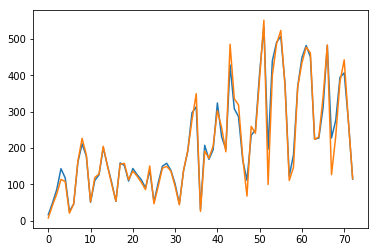

In [43]:
rf1 = RandomForestRegressor()
rf1.fit(np.concatenate((Xtrain,Xval,Xtest),0),sales_data)

predictions = rf1.predict(np.concatenate((Xtrain,Xval,Xtest),0))
plt.plot(predictions)
plt.plot(sales_data)

Since boosting is slightly different by performing the action on weak learners and sequential implementation, it could be helpful. (Random Forests perform the tree analysis parallely).

# Boosting

In [44]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [45]:
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=50,
       verbose=False)

[05:16:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

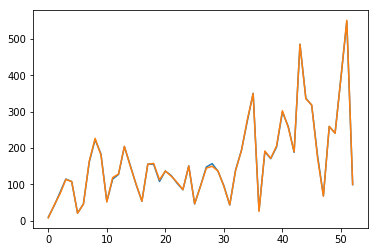

In [46]:
ypred = reg.predict(X_train)
plt.plot(ypred)
plt.plot(y_train)

In [47]:
ypred1 = reg.predict(X_val)
ypred2 = reg.predict(X_test)

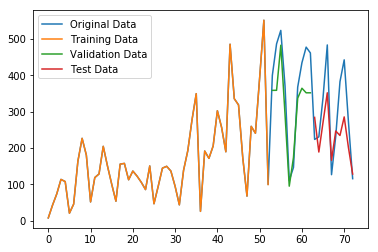

In [48]:
plt.figure()
plt.plot(sales_data)
plt.plot(np.arange(len(y_train)),y_train)
plt.plot(np.arange(len(y_val))+len(y_train),ypred1)
plt.plot(np.arange(len(y_test))+len(y_train) + len(y_val),ypred2)
plt.legend(['Original Data','Training Data','Validation Data','Test Data'])

In [49]:
boostrmse = np.sqrt(mean_squared_error(y_test,ypred2))
print(boostrmse)

90.0157607752788


Clearly this is not working out. So one of the trick that could be tried out is using lagged variables. Using the past sales data.

However, even that comes with its problems. One will have to do one step ahead prediction, append the data to the previous regressor and use that as the lagged variable. Does not sound as a great technique.

The boosting algorithms are not performing well here ofcourse other than one-step ahead prediction) where there is trend, non-stationarity and changing variance.

# ARIMAX

In [50]:
columns = ['Avg MRP','Avg Discount','Sales Price','Brand Code1.0','Brand Code1.1',
           'Brand Code1.2','Brand Code1.3','Brand Code1.4',
           'Cat Code1.0','Cat Code1.1','Sales Qty'
          ]
Xtrain_df = pd.DataFrame(np.concatenate((X_train[:,1:],y_train.reshape(-1,1)),1),columns=columns)
Xval_df = pd.DataFrame(np.concatenate((X_val[:,1:],y_val.reshape(-1,1)),1),columns=columns)
Xval_df = Xval_df.set_index(np.arange(len(y_val))+len(y_train))
Xtest_df = pd.DataFrame(np.concatenate((X_test[:,1:],y_test.reshape(-1,1)),1),columns=columns)
Xtest_df = Xtest_df.set_index(len(y_val)+len(y_train)+ np.arange(len(y_test)))

In [51]:
import statsmodels.api as sm
arimax = sm.tsa.statespace.SARIMAX(Xtrain_df['Sales Qty'],exog=Xtrain_df[columns[:-1]],order=[3,1,0]).fit()
arimax.summary()

/home/vivekkulkarni/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:              Sales Qty   No. Observations:                   53
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -280.437
Date:                Thu, 13 Jun 2019   AIC                            588.874
Time:                        05:16:55   BIC                            616.191
Sample:                             0   HQIC                           599.347
                                 - 53                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Avg MRP          -4.4547      3.794     -1.174      0.240     -11.890       2.981
Avg Discount      6.5876      1.911      3.448      0.001       2.843      10.332
Sales Price       0.0400      0.007      5.840      0.000       0.027       0.053
Brand Code1.0    20.0999    127.883      0.157      0.875    -230.545     270.745
Brand Code1.1    15.3923    136.554      0.113      0.910    -252.249     283.034
Brand Code1.2     7.6950    126.649      0.061      0.952    -240.532     255.922
Brand Code1.3    54.8587    151.854      0.361      0.718    -242.770     352.488
Brand Code1.4    12.2169    109.481      0.112      0.911    -202.361     226.795
Cat Code1.0      17.2058     66.087      0.260      0.795    -112.323     146.735
Cat Code1.1       2.7693     90.423      0.031      0.976    -174.457     179.995
ar.L1            -0.8004      0.231     -3.467      0.001      -1.253      -0.348
ar.L2            -0.2895      0.450     -0.643      0.520      -1.172       0.593
ar.L3            -0.0878      0.326     -0.270      0.787      -0.726       0.550
sigma2         2864.7601    610.883      4.690      0.000    1667.451    4062.069
===================================================================================
Ljung-Box (Q):                       27.89   Jarque-Bera (JB):               126.59
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               6.57   Skew:                            -1.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

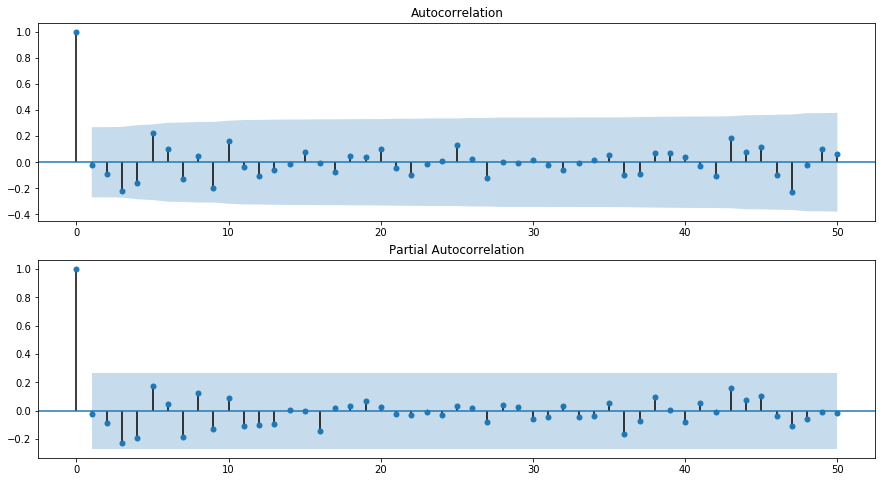

In [52]:
res = arimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1],method='ywmle')
plt.show()

In [53]:
pred_val = arimax.predict(53,62,exog = Xval_df[columns[:-1]])
pred_val = list(pred_val)

In [54]:
pred_test = arimax.predict(53,62,exog = Xtest_df[columns[:-1]])
pred_test = list(pred_test)

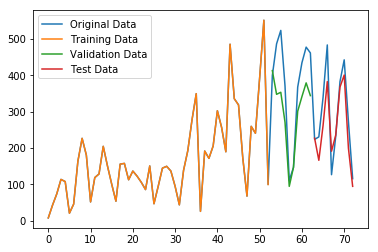

In [55]:
plt.figure()
plt.plot(sales_data)
plt.plot(y_train)
plt.plot(len(y_train) + np.arange(len(pred_val)),pred_val)
plt.plot(len(y_train)+len(y_val)+np.arange(len(pred_test)),pred_test)
plt.legend(['Original Data','Training Data','Validation Data','Test Data'])

In [56]:
rmse_arimax = np.sqrt(mean_squared_error(pred_test,y_test))

So to conclude all the forecasting methods tried out. These are the RMSEs.

In [57]:
print('RMSE for ARIMA:',score_arima)
print('RMSE for Linear Regression:',linreg_rmse)
print('RMSE for RandomForest:', rfmeans)
print('RMSE for ARIMAX:', rmse_arimax)

RMSE for ARIMA: 116.02744391559382
RMSE for Linear Regression: 50.84583339038213
RMSE for RandomForest: 126.02507914559051
RMSE for ARIMAX: 56.87521766655914


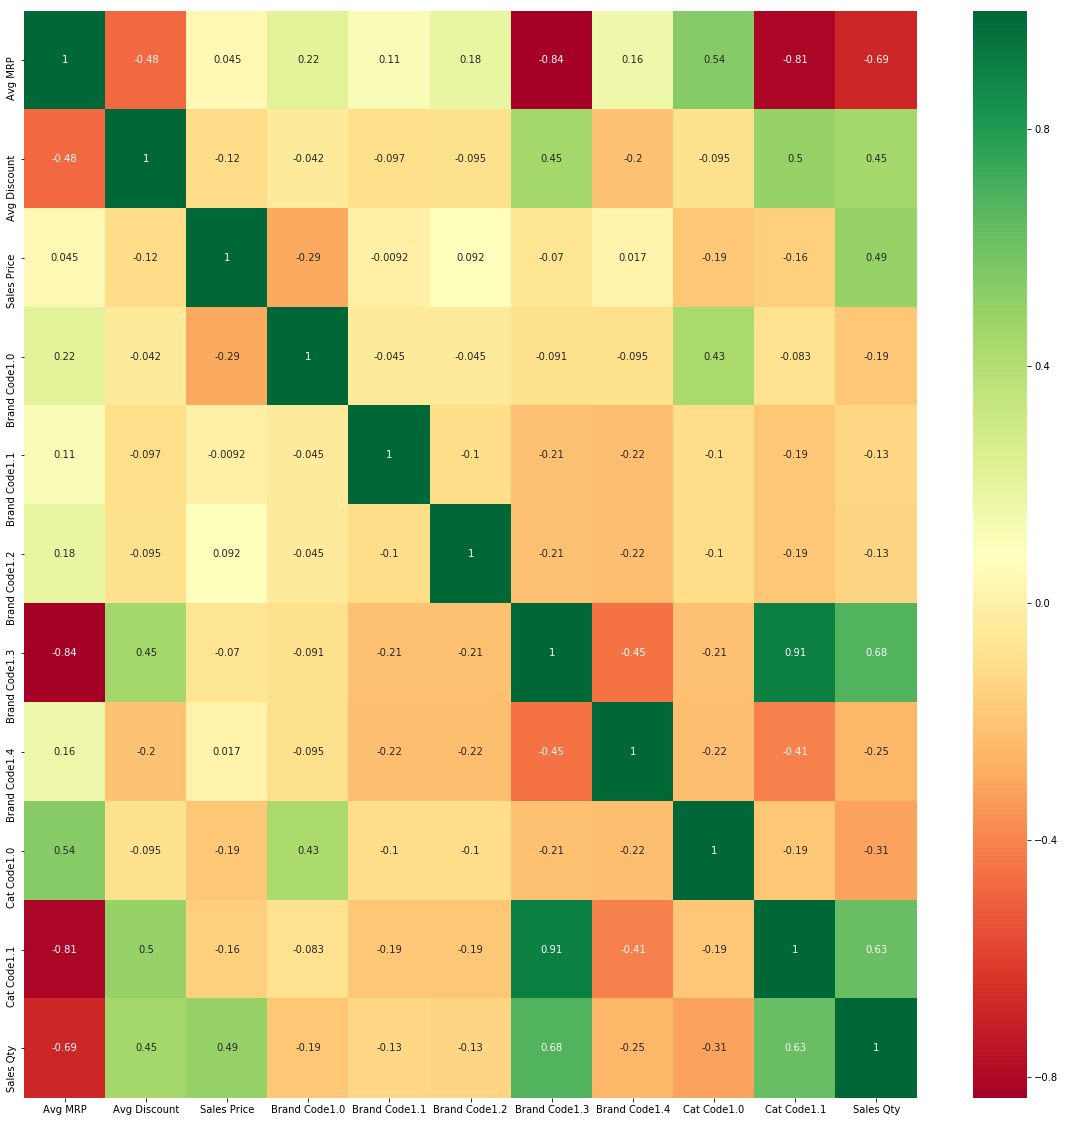

In [58]:
corrmat = Xtrain_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Xtrain_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Just to summarise, all the variables chosen have considerable weightage in predicting the sales data. So the feature engineering is reasonable.

So we can use the regression model or the ARIMAX model.